<div class="alert alert-success">
<h2>
<li style="text-align: left;">
<h3><strong>NAMA &emsp; &emsp;&emsp; &emsp; &emsp; &emsp;: Armanda Sanjaya</strong></h3>
</li>
<li style="text-align: left;">
<h3><strong>NIM &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; : 09011281722075</strong></h3>
</li>
<li style="text-align: left;">
<h3><strong>KELAS &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp; : SK5A</strong></h3>
</li>
<li style="text-align: left;">
<h3><strong>MATA KULIAH &emsp;&emsp;&emsp; : Kecerdasan Buatan</strong></h3>
</li>
</ul>
</div>

  >#  Pemilihan Supplier Obat Menggunakan Metode Fuzzy Mamdani 


Salah satu kegiatan yang ada di Apotik adalah transaksi penjualan obat-obatan
kepada pelanggan dan transaksi pembelian obat dari supplier. Pemenuhan kebutuhan
persediaan obat dilakukan dengan pemesanan ke berbagai supplier. Tidak semua
supplier memenuhi kriteria yang ditetapkan Apotik, maka harus dilakukan seleksi dan
menuntut bagian pembelian untuk memilih supplier yang tepat. Pemilihan supplier
masih dilakukan secara manual sehingga menghabiskan banyak waktu, ditambah lagi
tidak adanya kriteria yang jelas dari Apotik menyebabkan proses pemilihan supplier
cenderung dilakukan secara subyektif. Berbagai masalah dalam pemilihan supplier
adalah masalah pemenuhan kapasitas pemesanan supplier berdasarkan harga dan
fasilitas pembayaran yang ditawarkan oleh supplier, selain itu adanya masalah
keterlambatan waktu supplier dalam mengirim barang serta fleksibilitas supplier dalam
menangani perubahan pesanan.

In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

sebelum kita membuat program logika fuzzy kita harus memasukan library dengan instruksi "import",
pada code di atas telah saya import 3 library yaitu numpy,skfuzzy dan matlotlib.pylot.Adapun fungsi masing-masing dari library adalah sebagai berikut :

    1.numpy
    numpy a.k.a numerical python  adalah sebuah array yang dapat menampung banyak dimensi
    
    2.skfuzzy
    scikit-fuzzy a.k.a skfuzzy adalah  library yang digunakam untuk menampung nilai fuzzy logic
    
    
    3.matplotlib.pyplot
    yaitu berfungsi sebagai membuat grafik  dari dataframe atau numpy dengan berbagai macam jenis-jenis grafiknya

In [2]:
harga = np.arange(0,50001,10000)
pengalaman = np.arange(0,51,10)
waktu = np.arange(0,11,1)
rekomendasi = np.arange(0,101,1)

- Inisialisasi Input dan Output , untuk melakukan plotting

#  Input Fungsi Keangotaan

 ## a. Fungsi Keangotaan Harga 

In [3]:
harga_murah = fuzz.trapmf(harga,[0,0,10000,30000])
harga_sedang = fuzz.trimf(harga,[10000,30000,50000])
harga_mahal = fuzz.trimf(harga,[40000,50000,50000])


 **Harga : **                                                
- __Murah__ = rp.1 - rp.30.000
- **Sedang** = rp.10.0001 - rp.50.000
- **Mahal** = rp.40.001 - rp.50.000


$$ \mu Harga [Murah] = 
\left\{
    \begin{array}{ll}
       1 & \mbox{; } x < 10.000 \\
       {30.000-x \over 30.000 - 10.000} & \mbox{; } 10.000 < x < 30.000 \\
       0 & \mbox{; } x \geq 30.000
    \end{array}
\right.$$

$$ \mu Harga [Sedamg] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x ≤ 10.000 atau x \geq 50.000 \\
       {x-10.000 \over 30.000 - 10.000} & \mbox{; } 10.000 ≤  x ≤  30.000 \\
       1 & \mbox{; } x \geq 30.000\\
       {50.000-x \over 50.000 - 30.000} & \mbox{; } 30.000 ≤  x ≤  50.000 \\
    \end{array}
\right.$$


$$ \mu Harga [Mahal] = 
\left\{
    \begin{array}{ll}
       1 & \mbox{; } x \geq 50.000 \\
       0 & \mbox{; } x ≤ 40.000\\
       {x-40.000 \over 50.000 - 40.000} & \mbox{; } 40.000 < x < 50.000 \\
    \end{array}
\right.$$







## b. Fungsi Keangotaan Pengalaman 

In [4]:
pengalaman_kurang = fuzz.trapmf(pengalaman,[0,0,10,30])
pengalaman_sedang = fuzz.trimf(pengalaman,[10,30,50])
pengalaman_baik = fuzz.trimf(pengalaman,[40,50,50])

**Pengalaman : **
- **Kurang** = 1 - 30
- **Sedang** = 10 - 50
- **Baik** = 40 - 50


$$ \mu Pengalaman [Kurang] = 
\left\{
    \begin{array}{ll}
       1 & \mbox{; } x ≤ 10 \\
       {30-x \over 30 - 10} & \mbox{; } 10 < x < 30 \\
       0 & \mbox{; } x \geq 30
    \end{array}
\right.$$

$$ \mu Pengalaman [Sedang] = 
\left\{
    \begin{array}{ll}
       1 & \mbox{; } x \geq 30 \\
       {50-x \over 50 - 30} & \mbox{; } 30 < x < 50 \\
       0 & \mbox{; } {x ≤  10 atau x \geq 50}\\
       {x-10 \over 30 - 10} & \mbox{; } 10 < x < 30 \\
    \end{array}
\right.$$


$$ \mu Pengalaman [Baik] = 
\left\{
    \begin{array}{ll}
       1 & \mbox{; } x \geq 50 \\
       0 & \mbox{; } x  ≤  40\\
       {x-40 \over 50 - 40} & \mbox{; } 40 < x < 50 \\
    \end{array}
\right.$$

## c. Fungsi Keangotaan Waktu

In [5]:
waktu_cepat = fuzz.trapmf(waktu,[0,0,5,10])
waktu_lambat = fuzz.trimf(waktu,[5,10,10])

**Waktu**
- **Cepat** = 1 - 10
- **Lambat** = 5 - 10

$$ \mu Waktu [Cepat] = 
\left\{
    \begin{array}{ll}
       1 & \mbox{; } x ≤ 5 \\
       {10-x \over  10-5 } & \mbox{; } 5 ≤ x ≤ 10 \\
       0 & \mbox{; } x \geq 10
    \end{array}
\right.$$

$$ \mu Waktu [Lambat] = 
\left\{
    \begin{array}{ll}
       1 & \mbox{; } x \geq 10 \\
       0 & \mbox{; } x  ≤  5\\
       {x-5 \over 10 - 5} & \mbox{; } 5 ≤ x ≤ 10 \\
    \end{array}
\right.$$


## d. Output  Fungsi Keangotaan

In [6]:
rekomendasi_rendah = fuzz.trimf(rekomendasi,[0,0,100]) 
rekomendasi_tinggi = fuzz.trimf(rekomendasi,[0,100,100])

**Rekomendasi : **
- __Rendah__ = 1-100
- __Tinggi__ = 1-100


# Plotting Fungsi Keangotaan Harga

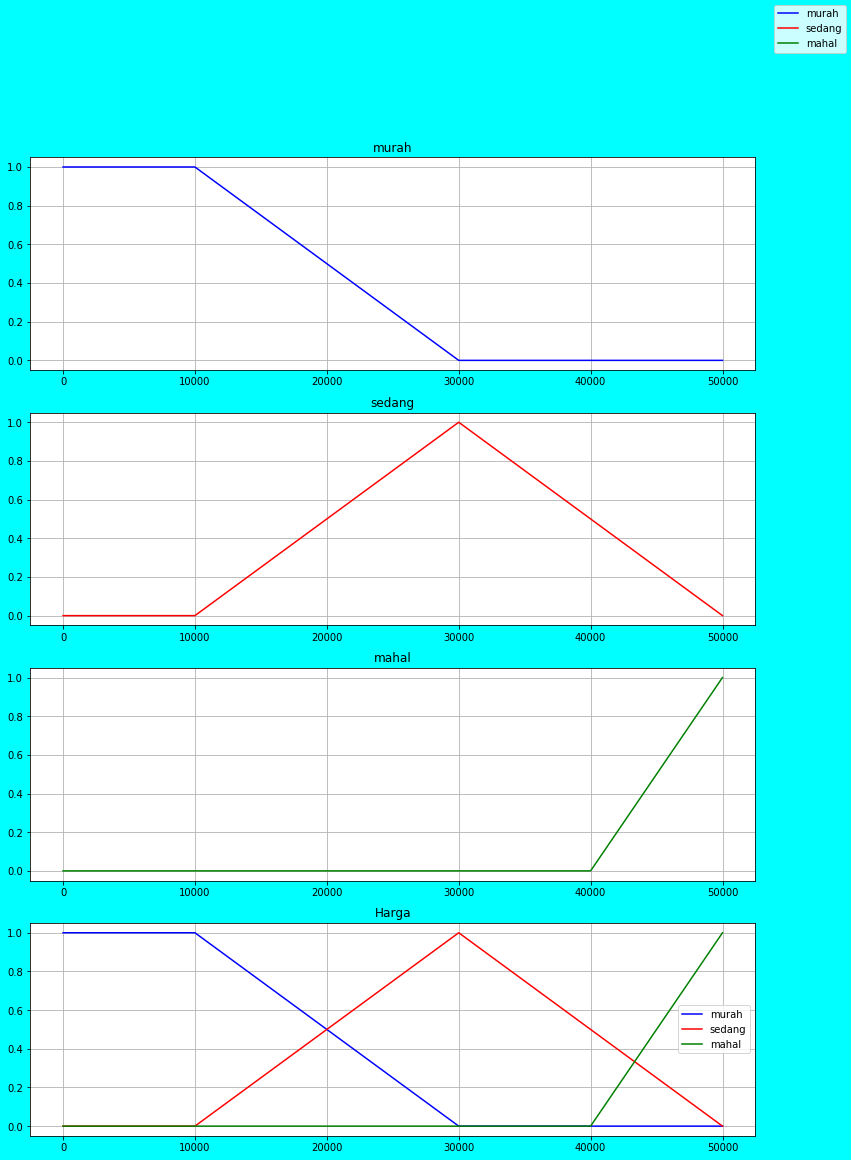

In [7]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=4, facecolor ='aqua', figsize=(13,18))
ax0.plot(harga, harga_murah, 'b', linewidth=1.5, label='murah')
ax1.plot(harga, harga_sedang, 'r', linewidth=1.5, label='sedang')
ax2.plot(harga, harga_mahal, 'g', linewidth=1.5, label='mahal')
ax0.set_title('murah')
ax1.set_title('sedang')
ax2.set_title('mahal')
fig.legend()
ax0.grid()
ax1.grid()
ax2.grid()

ax3.plot(harga, harga_murah, 'b', linewidth=1.5, label='murah')
ax3.plot(harga, harga_sedang, 'r', linewidth=1.5, label='sedang')
ax3.plot(harga, harga_mahal, 'g', linewidth=1.5, label='mahal')
ax3.set_title('Harga')
ax3.grid()
ax3.legend()

# Plotting Fungsi Keangotaan Pengalaman

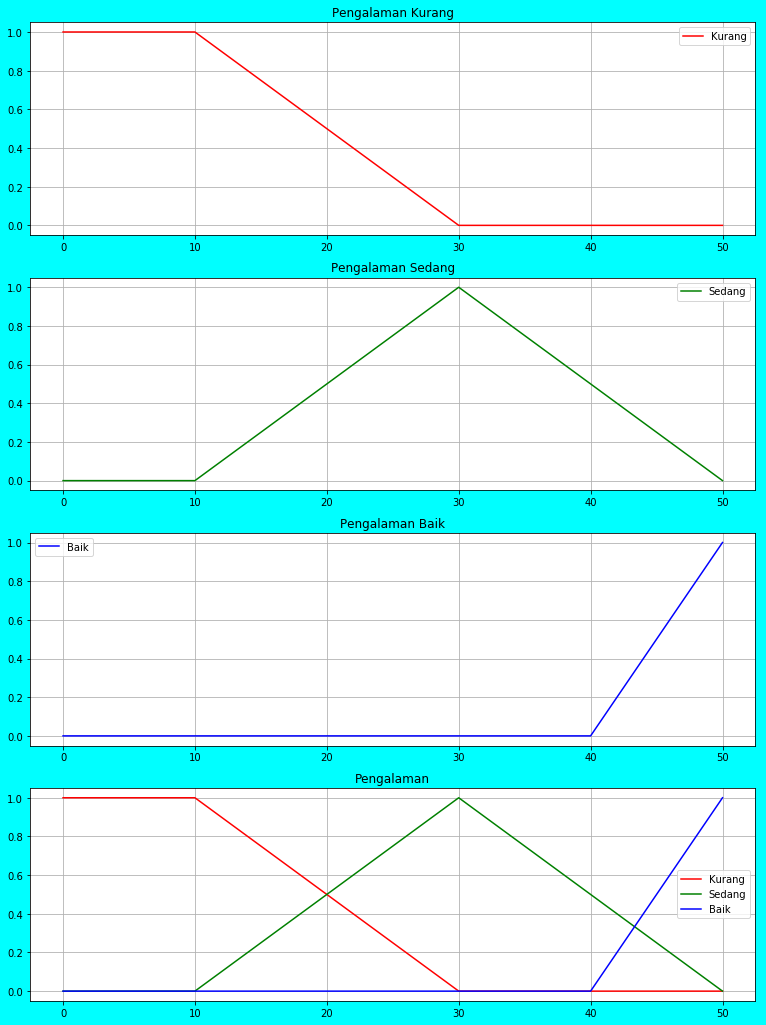

In [8]:
fig, (ax0,ax1,ax2,ax3) = plt.subplots(nrows= 4 ,facecolor='aqua', figsize=(13, 18))
ax0.plot(pengalaman, pengalaman_kurang, 'red', linewidth=1.5, label='Kurang')
ax0.set_title('Pengalaman Kurang')
ax0.grid()
ax0.legend()

ax1.plot(pengalaman, pengalaman_sedang, 'green', linewidth=1.5, label='Sedang')
ax1.set_title('Pengalaman Sedang')
ax1.grid()
ax1.legend()

ax2.plot(pengalaman, pengalaman_baik, 'blue', linewidth=1.5, label='Baik')
ax2.set_title('Pengalaman Baik')
ax2.grid()
ax2.legend()

ax3.plot(pengalaman, pengalaman_kurang, 'red', linewidth=1.5, label='Kurang')
ax3.plot(pengalaman, pengalaman_sedang, 'green', linewidth=1.5, label='Sedang')
ax3.plot(pengalaman, pengalaman_baik, 'blue', linewidth=1.5, label='Baik')
ax3.set_title('Pengalaman')
ax3.grid()
ax3.legend()

#  Plotting Fungsi Keangotaan Waktu

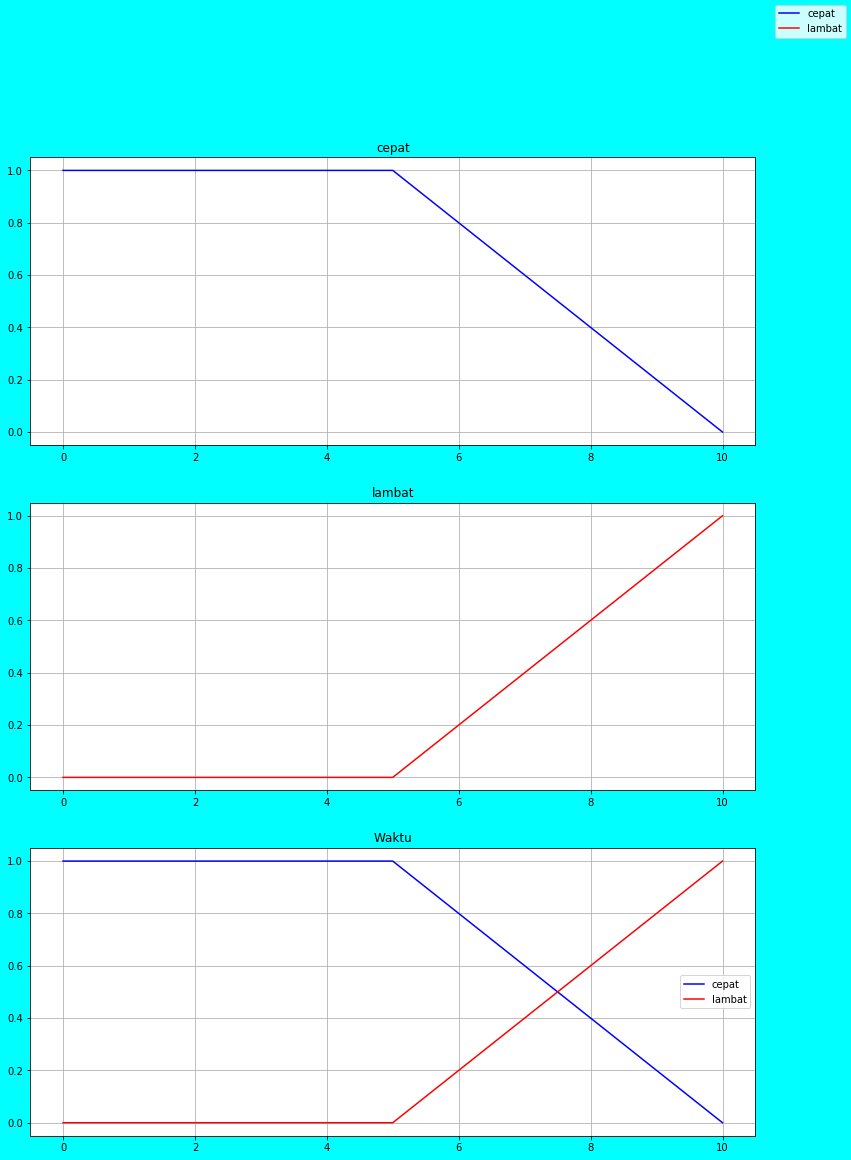

In [9]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, facecolor='aqua', figsize=(13,18))
ax0.plot(waktu,waktu_cepat, 'b', linewidth=1.5, label='cepat')
ax1.plot(waktu,waktu_lambat ,'r', linewidth=1.5, label='lambat')
ax0.set_title('cepat')
ax1.set_title('lambat')
fig.legend()
ax0.grid()
ax1.grid()

ax2.plot(waktu,waktu_cepat, 'b', linewidth=1.5, label='cepat')
ax2.plot(waktu,waktu_lambat, 'r', linewidth=1.5, label='lambat')
ax2.set_title('Waktu')
ax2.grid()
ax2.legend()

In [21]:
harga = ctrl.Antecedent(np.arange(0,50001,10000), 'harga')
pengalaman = ctrl.Antecedent(np.arange(0,51,10), 'pengalaman')
waktu = ctrl.Antecedent(np.arange(0,11,1), 'waktu')
rekomendasi = ctrl.Consequent(np.arange(0,101,1), 'rekomendasi')


Menentukan input dan output nilai fuzzy

In [22]:
harga['murah'] = fuzz.trapmf(harga.universe,[0,0,10000,30000])
harga['sedang'] = fuzz.trimf(harga.universe,[10000,30000,50000])
harga['mahal'] = fuzz.trimf(harga.universe,[40000,50000,50000])

pengalaman['kurang'] = fuzz.trapmf(pengalaman.universe,[0,0,10,30])
pengalaman['sedang'] = fuzz.trimf(pengalaman.universe,[10,30,50])
pengalaman['baik'] = fuzz.trimf(pengalaman.universe,[40,50,50])

waktu['cepat'] = fuzz.trapmf(waktu.universe,[0,0,5,10])
waktu['lambat'] = fuzz.trimf(waktu.universe,[5,10,10])

rekomendasi['rendah'] = fuzz.trimf(rekomendasi.universe,[0,0,100]) 
rekomendasi['tinggi'] = fuzz.trimf(rekomendasi.universe,[0,100,100])


Inisialisasi semesta untuk plotting

# Rule Base (Basis Aturan)

Membuat basis aturan dalam bentuk If... Then dengan mengunakan operator And(&)

In [23]:
rule1 = ctrl.Rule(harga['murah'] & pengalaman['kurang'] & waktu['cepat'],rekomendasi['rendah'])
rule2 = ctrl.Rule(harga['murah'] & pengalaman['sedang'] & waktu['cepat'],rekomendasi['tinggi'])
rule3 = ctrl.Rule(harga['murah'] & pengalaman['baik'] & waktu['cepat'],rekomendasi['tinggi'])
rule4 = ctrl.Rule(harga['murah'] & pengalaman['kurang'] & waktu['lambat'],rekomendasi['rendah'])
rule5 = ctrl.Rule(harga['murah'] & pengalaman['sedang'] & waktu['lambat'],rekomendasi['tinggi'])
rule6 = ctrl.Rule(harga['murah'] & pengalaman['baik'] & waktu['lambat'],rekomendasi['tinggi'])
rule7 = ctrl.Rule(harga['sedang'] & pengalaman['kurang'] & waktu['cepat'],rekomendasi['rendah'])
rule8 = ctrl.Rule(harga['sedang'] & pengalaman['sedang'] & waktu['cepat'],rekomendasi['tinggi'])
rule9 = ctrl.Rule(harga['sedang'] & pengalaman['baik'] & waktu['cepat'],rekomendasi['tinggi'])
rule10 = ctrl.Rule(harga['sedang'] & pengalaman['kurang'] & waktu['lambat'],rekomendasi['rendah'])
rule11 = ctrl.Rule(harga['sedang'] & pengalaman['sedang'] & waktu['lambat'],rekomendasi['tinggi'])
rule12 = ctrl.Rule(harga['sedang'] & pengalaman['baik'] & waktu['lambat'],rekomendasi['tinggi'])
rule13 = ctrl.Rule(harga['mahal'] & pengalaman['kurang'] & waktu['cepat'],rekomendasi['rendah'])
rule14 = ctrl.Rule(harga['mahal'] & pengalaman['sedang'] & waktu['cepat'],rekomendasi['rendah'])
rule15 = ctrl.Rule(harga['mahal'] & pengalaman['baik'] & waktu['cepat'],rekomendasi['tinggi'])
rule16 = ctrl.Rule(harga['mahal'] & pengalaman['kurang'] & waktu['lambat'],rekomendasi['rendah'])
rule17 = ctrl.Rule(harga['mahal'] & pengalaman['sedang'] & waktu['lambat'],rekomendasi['rendah'])
rule18 = ctrl.Rule(harga['mahal'] & pengalaman['baik'] & waktu['lambat'], rekomendasi['tinggi'])

# Rule Evaluation

In [13]:
rekomendasi_ctrl = ctrl.ControlSystem([rule1, rule2, rule3,rule4, rule5, rule6,rule7, rule8, rule9, rule10, 
                                  rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18,])

# Defuzzifikasi

In [14]:
hasil = ctrl.ControlSystemSimulation(rekomendasi_ctrl)

Disini kita Membuat contoh kasus dimana obat yang di supply berharga Rp.27.000 , waktu pengiriman 7 jam dan pengalaman supplier 43 tahun

dengan menggunakan perintah "hasil.compute()" untuk melakukan perhitungan defuzzifikasi

58.13131313131305


C:\Users\ASUS\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


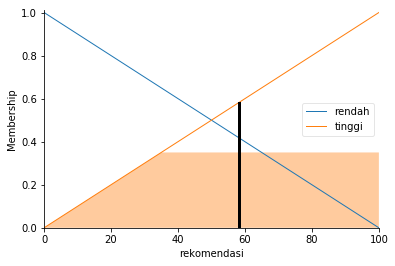

In [15]:
hasil.input['harga'] = 27000
hasil.input['pengalaman'] = 43
hasil.input['waktu'] = 7
hasil.compute()
print (hasil.output['rekomendasi'])
rekomendasi.view(sim=hasil)

# Perhitungan Manual

Dengan Contoh kasus , Membeli Obat dari Supplier dengan harga Rp.27.000 , pengalaman supplier 43 dan Waktu pengiriman 7 

**Harga = 27.000**
$$ Masukkan\,nilai\,harga\,ke\,dalam\,masing-masing\,fungsi\,keanggotaan\,harga\\
\mu Harga [Murah] = 
\left\{
    \begin{array}{ll}
       1 & \mbox{; } x < 10.000 \\
       {30.000-x \over 30.000 - 10.000} & \mbox{; } 10.000 < x < 30.000 .\checkmark\\
       0 & \mbox{; } x \geq 30.000
    \end{array}
\right.$$

$$ \mu Harga [Sedamg] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x ≤ 10.000 atau x \geq 50.000 \\
       {x-10.000 \over 30.000 - 10.000} & \mbox{; } 10.000 ≤  x ≤  30.000 .\checkmark \\
       1 & \mbox{; } x \geq 30.000\\
       {50.000-x \over 50.000 - 30.000} & \mbox{; } 30.000 ≤  x ≤  50.000 \\
    \end{array}
\right.$$


$$ \mu Harga [Mahal] = 
\left\{
    \begin{array}{ll}
       1 & \mbox{; } x \geq 50.000 \\
       0 & \mbox{; } x ≤ 40.000\\
       {x-40.000 \over 50.000 - 40.000} & \mbox{; } 40.000 < x < 50.000 \\
    \end{array}
\right.$$

=================================================================================================================


\begin{equation}
    \mu HargaMurah(27.000) = (30.000 - 27.000) / (30.000 - 10.000) \\
    \mu HargaMurah(27.000) = 3000/20.000 \\ 
    \mu HargaMurah(27.000) = 0.15 \\
    \mu HargaSedang(27.000) = (27.000 - 10.000) / (30.000-10.000) \\
    \mu HargaSedang(27.000) = 17.000\,20.000 \\
    \mu HargaSedang(27.000) = 0.85 \\
\end{equation}

=================================================================================================================


**Pengalaman = 43**
$$ Masukkan\,nilai\,pengalaman\,ke\,dalam\,masing-masing\,fungsi\,keanggotaan\,pengalaman\\
\mu Pengalaman [Kurang] = 
\left\{
    \begin{array}{ll}
       1 & \mbox{; } x ≤ 10 \\
       {30-x \over 30 - 10} & \mbox{; } 10 < x < 30 \\
       0 & \mbox{; } x \geq 30 .\checkmark \\
    \end{array}
\right.$$

$$ \mu Pengalaman [Sedang] = 
\left\{
    \begin{array}{ll}
       1 & \mbox{; } x \geq 30  .\checkmark \\
       {50-x \over 50 - 30} & \mbox{; } 30 < x < 50 .\checkmark \\
       0 & \mbox{; } {x ≤  10 atau x \geq 50}\\
       {x-10 \over 30 - 10} & \mbox{; } 10 < x < 30 \\
    \end{array}
\right.$$


$$ \mu Pengalaman [Baik] = 
\left\{
    \begin{array}{ll}
       1 & \mbox{; } x \geq 50 \\
       0 & \mbox{; } x  ≤  40\\
       {x-40 \over 50 - 40} & \mbox{; } 40 < x < 50 .\checkmark\\
    \end{array}
\right.$$

=================================================================================================================


\begin{equation}
    \mu PengalamanKurang(43) = (50-43) / (50-30) \\
    \mu PengalamanKurang(43) = 7/20 \\ 
    \mu PengalamanKurang(43) = 0.35 \\
    \mu PengalamanSedang(43) = (43-40) / (50-40) \\
    \mu PengalamanSedang(43) = 3\,10 \\
    \mu PengalamanSedang(43) = 0.33 \\
\end{equation}

=================================================================================================================


**Waktu = 7**
$$Masukkan\,nilai\,waktu\,ke\,dalam\,masing-masing\,fungsi\,keanggotaan\,waktu\\
\mu Waktu [Cepat] = 
\left\{
    \begin{array}{ll}
       1 & \mbox{; } x ≤ 5 \\
       {10-x \over  10-5 } & \mbox{; } 5 ≤ x ≤ 10 .\checkmark\\
       0 & \mbox{; } x \geq 10
    \end{array}
\right.$$

$$ \mu Waktu [Lambat] = 
\left\{
    \begin{array}{ll}
       1 & \mbox{; } x \geq 10 \\
       0 & \mbox{; } x  ≤  5\\
       {x-5 \over 10 - 5} & \mbox{; } 5 ≤ x ≤ 10 .\checkmark\\
    \end{array}
\right.$$

=================================================================================================================


\begin{equation}
    \mu WaktuCepat(7) = (10-7) / (10-5) \\
    \mu WaktuCepat(7) = 3/5 \\ 
    \mu WaktuCepat(7) = 0.6 \\
    \mu WaktuLambat(7) = (7-5) / (10-5) \\
    \mu WaktuLambat(7) = 2 / 5 \\
    \mu WaktuLambat(7) = 0.4 \\
\end{equation}

=================================================================================================================


## Rule Evaluation

- Disini dapat dilihat rule mana saja yang aktif saat harga bernilai 27.000 , pengalaman bernilai 43 dan waktu bernilai 7
    terdapat 8 rule yang aktif

1.HargaMurah (0.15) & PengalamanKurang(0.35) & WaktuLambat(0.4) = rekomendasi rendah(0.15)
2.HargaMurah (0.15) & PengalamanKurang(0.35) & WaktuCepat(0.6) = rekomendasi rendah(0.15)
3.HargaMurah (0.15) & PengalamanSedang(0.33) & WaktuLambat(0.4) = rekomendasi tinggi(0.15)
4.HargaMurah (0.15) & PengalamanSedang(0.33) & WaktuCepat(0.6) = rekomendasi tinggi(0.15)
5.HargaSedang (0.85) & PengalamanKurang(0.35) & WaktuLambat(0.4) = rekomendasi rendah(0.35)
6.HargaSedang (0.85) & PengalamanKurang(0.35) & WaktuCepat(0.6) = rekomendasi rendah(0.35)
7.HargaSedang (0.85) & PengalamanSedang(0.33) & WaktuLambat(0.4) = rekomendasi tinggi(0.33)
8.HargaSedang (0.85) & PengalamanSedang(0.33) & WaktuCepat(0.4) = rekomendasi tinggi(0.33)


## Mencari Nilai Luas Daerah 

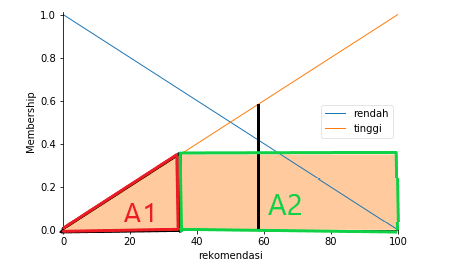

### 1. Mencari nilai A1 dan X1

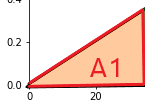

A1 yaitu luas daerah pada segitiga , mengunakan rumus luas segitiga yaitu 1/2(alas x tinggi)
   - Masukan nilai nilai nya dan di dapat hasil sebagai berikut
    - A1 = 1/2(35 x 0.35) = 6.125

X1 adalah nilai tengah dari bangun datar tersebut , yaitu berbentuk segitiga siku-siku sisi miring sebelah kiri dengan rumus X1 = a + 2/3(b-a)
    - Masukan nilai nilai nya dan didapat hasil sebagai berikut
     - X1 = 1 + 2/3(35-1) = 23.667
     

### 2. Mencari nilai A2 dan X2

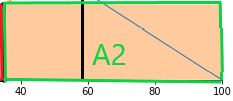

A2 yaitu luas daerah pada persegi panjang , mengunakan rumus luas persegi panjang yaitu (P x L)
   - Masukan nilai nilai nya dan di dapat hasil sebagai berikut
    - A2 = 65 x (0.35) = 22.75

X2 adalah nilai tengah dari bangun datar tersebut , yaitu berbentuk persegi panjang dengan rumus X2 = 1/2(b+a) 
    - Masukan nilai nilai nya dan didapat hasil sebagai berikut
     - X2 = 1/2(100+36) = 68
     

### 3.Metode Centroid

Nilai Rekomendasi = 
(A1.X1) + (A2.X2) / A1 + A2
- (144.958334) + (1547) / 29.7916667
 - 1691.95833 / 29.7916667 = 56.7930068
 

Analisa

- Dari Hasil perhitungan pada python dan pada perhitungan manual terdapat perbedaan nilai yaitu selisih = 1.33830633
  dan nilai dari perhitungan python adalah 58.13131313131305 sedangkan dari perhitungan manual adalah 56.7930068